## Computational Neuroscience Assignment 3

### Authors:
* Jochem Beurskens s4637801
* Kirina van der Bijl S1061566
* Arne Diehl S4451392

In [ ]:
import numpy as np
import scipy as sp
from scipy import optimize, integrate
import sympy as simp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits import mplot3d

## Exercise 1
### 1.a Implement the regular spiking pyramidal cell model in python


This is where we start to define the simplified pyramidal cell model.

In [ ]:
# Parameters of the simulation
timestep = 0.1             # ms
total_time = 0.1*100000      # ms

In [ ]:
# Parameters of the neuron
params = {
    'v_rest': -50.0,
    'v_thresh': 35.0,
    'u_reset_change': 100.0,
    'timestep': 0.1   #ms
}

In [ ]:
class deterministic_LIF_neuron():
  def __init__(self, v0, u0, parameters):
    self.parameters = parameters 
    self.membrane_voltages = np.full((1),self.parameters['v_rest'])
    self.membrane_u = np.full((1),self.parameters['u_reset_change']-50)
    self.membrane_voltages[0] = v0 #-20 #-52.21103223
    self.membrane_u[0] = u0 #0 # -15.57793555
  def update_states(self, input):
    self.membrane_u += self.parameters['timestep'] * (0.03 * (-2 * (self.membrane_voltages + 60) - self.membrane_u ))
    self.membrane_voltages += self.parameters['timestep'] * (0.7 * (self.membrane_voltages + 60) * (self.membrane_voltages + 40) - self.membrane_u +  input) / 100
    spikes = np.where(self.membrane_voltages>=self.parameters['v_thresh'],1,0)
    self.membrane_u[self.membrane_voltages>=self.parameters['v_thresh']] += self.parameters['u_reset_change']
    self.membrane_voltages[self.membrane_voltages>=self.parameters['v_thresh']] = self.parameters['v_rest']
    return spikes

### 1.b.1 For what value of I does the neuron Spike?


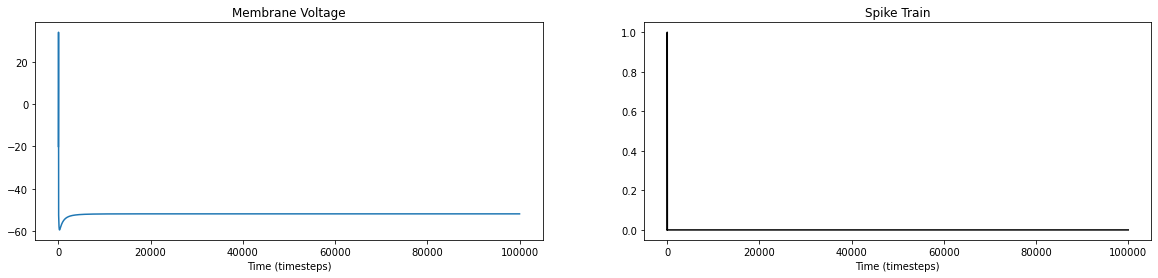

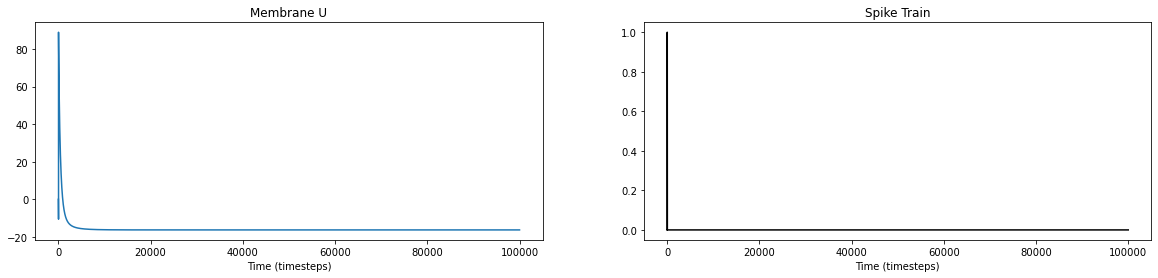

In [ ]:
model = deterministic_LIF_neuron(v0=-20, u0=0, parameters=params)
I=51.3
out_spikes = []
out_mem = []
out_u = []

# Run the model state update for each timestep of our inputs
# Store the spikes of the output neurons and a copy of the membrane voltages
for ts in range(int(total_time/timestep)):
  out_mem.append(np.copy(model.membrane_voltages))
  out_u.append(np.copy(model.membrane_u))
  output_spikes = model.update_states(I)
  out_spikes.append(output_spikes)

plt.figure(figsize=(20,4))
plt.subplot(1,2,1);
plt.plot(np.asarray(out_mem));
plt.title("Membrane Voltage");
plt.xlabel("Time (timesteps)");
plt.subplot(1,2,2);
plt.plot(np.asarray(out_spikes), color='k');
plt.title("Spike Train");
plt.xlabel("Time (timesteps)");

plt.figure(figsize=(20,4))
plt.subplot(1,2,1);
plt.plot(np.asarray(out_u));
plt.title("Membrane U");
plt.xlabel("Time (timesteps)");
plt.subplot(1,2,2);
plt.plot(np.asarray(out_spikes), color='k');
plt.title("Spike Train");
plt.xlabel("Time (timesteps)");

In the graphs above we can see that there is no spike triggered when $I=51, v0=-50,u0=0$. When we increase $v0$ to $v0=-20$ We observe a single spike at the beginning of the simulation. When we increase $I$ to $I=52$ we observe repeated spiking behaviour.

### 1.b.2 Describe the bifurcation at the onset of spiking


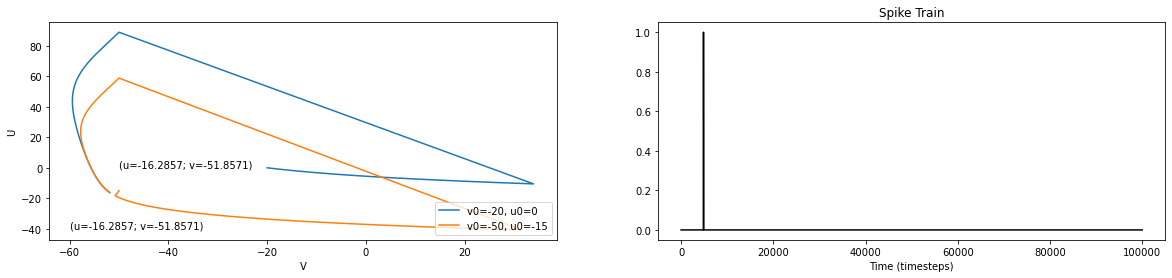

In [ ]:
plt.figure(figsize=(20,4))
plt.title("Phase Plane");
plt.subplot(1,2,1);
plt.xlabel("V");
plt.ylabel("U");
I = 51.3


model = deterministic_LIF_neuron(v0=-20, u0=0, parameters=params)
out_spikes = []
out_mem = []
out_u = []
for ts in range(int(total_time/timestep)):
  out_mem.append(np.copy(model.membrane_voltages))
  out_u.append(np.copy(model.membrane_u))
  output_spikes = model.update_states(I)
  out_spikes.append(output_spikes)
plt.plot(np.asarray(out_mem),np.asarray(out_u),label='v0=-20, u0=0');
plt.text(-50, 0, '(u={:.4f}; v={:.4f})'.format(float(out_u[-1]),float(out_mem[-1])))

model = deterministic_LIF_neuron(v0=-50, u0=-15, parameters=params)
out_spikes = []
out_mem = []
out_u = []
for ts in range(int(total_time/timestep)):
  out_mem.append(np.copy(model.membrane_voltages))
  out_u.append(np.copy(model.membrane_u))
  output_spikes = model.update_states(I)
  out_spikes.append(output_spikes)
plt.plot(np.asarray(out_mem),np.asarray(out_u),label='v0=-50, u0=-15');
plt.text(-60, -40, '(u={:.4f}; v={:.4f})'.format(float(out_u[-1]),float(out_mem[-1])))

plt.legend(loc='lower right')
plt.subplot(1,2,2);
plt.plot(np.asarray(out_spikes), color='k');
plt.title("Spike Train");
plt.xlabel("Time (timesteps)");
plt.show()

With the value $I=51.3$ we can see that the trajectory in the phase plane moves towards the point $(-51.8571;-16,2857)$. Thus we conclude that there seems to be a stable point. However for start points to the right of this fixed point, we see that the trajectory moves away, before converging onto the fixed point after spiking. Note that the straight line on top reflects the resetting of the neuron, which happens instantly, thus v and u do not take the values plotted within that line.


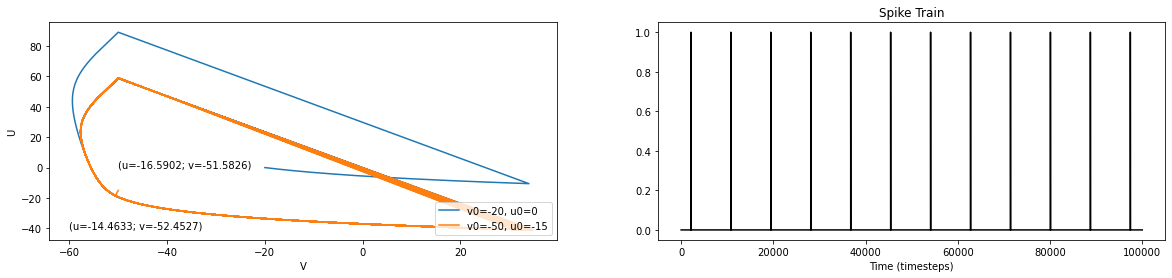

In [ ]:
plt.figure(figsize=(20,4))
plt.title("Phase Plane");
plt.subplot(1,2,1);
plt.xlabel("V");
plt.ylabel("U");
I = 52


model = deterministic_LIF_neuron(v0=-20, u0=0, parameters=params)
out_spikes = []
out_mem = []
out_u = []
for ts in range(int(total_time/timestep)):
  out_mem.append(np.copy(model.membrane_voltages))
  out_u.append(np.copy(model.membrane_u))
  output_spikes = model.update_states(I)
  out_spikes.append(output_spikes)
plt.plot(np.asarray(out_mem),np.asarray(out_u),label='v0=-20, u0=0');
plt.text(-50, 0, '(u={:.4f}; v={:.4f})'.format(float(out_u[-1]),float(out_mem[-1])))

model = deterministic_LIF_neuron(v0=-50, u0=-15, parameters=params)
out_spikes = []
out_mem = []
out_u = []
for ts in range(int(total_time/timestep)):
  out_mem.append(np.copy(model.membrane_voltages))
  out_u.append(np.copy(model.membrane_u))
  output_spikes = model.update_states(I)
  out_spikes.append(output_spikes)
plt.plot(np.asarray(out_mem),np.asarray(out_u),label='v0=-50, u0=-15');
plt.text(-60, -40, '(u={:.4f}; v={:.4f})'.format(float(out_u[-1]),float(out_mem[-1])))

plt.legend(loc='lower right')
plt.subplot(1,2,2);
plt.plot(np.asarray(out_spikes), color='k');
plt.title("Spike Train");
plt.xlabel("Time (timesteps)");
plt.show()

With the value $I=52$ we can see that the trajectories converge to a limit cycle. This means that the fixed point that was stable when $I=51.3$ is no longer stable. Since the trajectories form a limit cycle, we know that there must be a fixed point within the area enclosed by the limit cycle. Again note that the straight line is just an artifact from the matplotlib plotting function.

### 1.b.3 How does the firing rate vary with I?


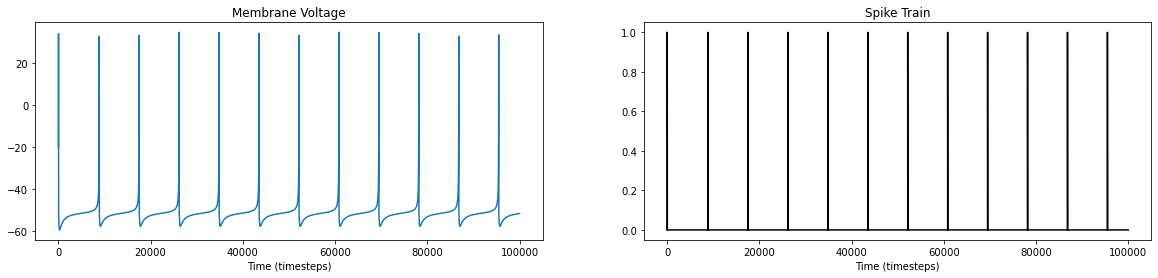

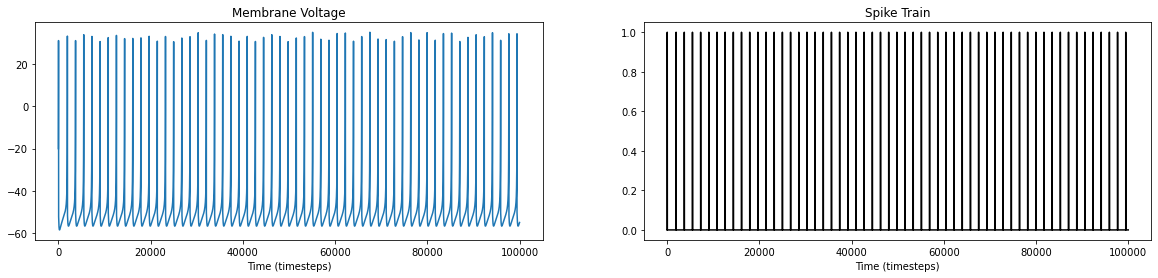

In [ ]:
model = deterministic_LIF_neuron(v0=-20, u0=0, parameters=params)
I=52
out_spikes = []
out_mem = []
out_u = []

for ts in range(int(total_time/timestep)):
  out_mem.append(np.copy(model.membrane_voltages))
  out_u.append(np.copy(model.membrane_u))
  output_spikes = model.update_states(I)
  out_spikes.append(output_spikes)

plt.figure(figsize=(20,4))
plt.subplot(1,2,1);
plt.plot(np.asarray(out_mem));
plt.title("Membrane Voltage");
plt.xlabel("Time (timesteps)");
plt.subplot(1,2,2);
plt.plot(np.asarray(out_spikes), color='k');
plt.title("Spike Train");
plt.xlabel("Time (timesteps)");

model = deterministic_LIF_neuron(v0=-20, u0=0, parameters=params)
I=65
out_spikes = []
out_mem = []
out_u = []

for ts in range(int(total_time/timestep)):
  out_mem.append(np.copy(model.membrane_voltages))
  out_u.append(np.copy(model.membrane_u))
  output_spikes = model.update_states(I)
  out_spikes.append(output_spikes)

plt.figure(figsize=(20,4))
plt.subplot(1,2,1);
plt.plot(np.asarray(out_mem));
plt.title("Membrane Voltage");
plt.xlabel("Time (timesteps)");
plt.subplot(1,2,2);
plt.plot(np.asarray(out_spikes), color='k');
plt.title("Spike Train");
plt.xlabel("Time (timesteps)");

As we can see in the graph above the firing rate increases with the value of $I$.

### 1.b.4 what type of spiking behavior does this neuron show?

We can see from the graphs above that model spikes follow a tonic firing pattern. This makes sense, as we observe stable limit cycles when $I$ stays constant, thus we expected a recurring spiking pattern.

### 1.c Implement a network of ‘N’ of these neurons and couple them according to a general connection matrix


## Randomly Connected Network

In [ ]:
class LIF_network():
  """A class to store internal variables of our LIF neurons and to spit out spikes
  """
  def __init__(self, N, weight_matrix, parameters):
    """Initialises internal variables (weight matrix and membrane voltages)
        
        Parameters
        ----------
          N: number of LIF neurons to simulate
          parameters: a dictionary of parameters needed to update the internal state
    """
    self.N = N
    # State variables for this class
    self.parameters = parameters # A dictionary of parameters
    self.neuron_voltages =  np.full((N),self.parameters['v_rest'])
    self.neuron_u =  np.full((N),0.0)
    self.input = np.zeros((N))
    self.weight_matrix = weight_matrix

  def update_states_one_for_one(self):
    self.input[0] = 1250
    spikes_out = np.zeros_like(self.neuron_voltages)
    for neuron in range(self.N):
      self.neuron_u[neuron] += self.parameters['timestep'] * (0.03 * (-2 * (self.neuron_voltages[neuron] + 60) - self.neuron_u[neuron] ))
      self.neuron_voltages[neuron] += self.parameters['timestep'] * (0.7 * (self.neuron_voltages[neuron] + 60) * (self.neuron_voltages[neuron] + 40) - self.neuron_u[neuron] + self.input[neuron]) / 100.0
      self.input[neuron] = 0.0 # implement some kind of input decay
      spikes = np.where(self.neuron_voltages>=self.parameters['v_thresh'],3500,0)
      if np.sum(spikes)>0:
        self.input += self.weight_matrix.T @ spikes
        self.neuron_voltages[neuron] = self.parameters['v_rest']
        self.neuron_u[neuron] += self.parameters['u_reset_change']
      spikes_out += spikes
    return np.where(spikes_out>0,1,0)

  def update_states_one_for_one_mod(self):
    self.input[0] = 1250
    spikes_out = np.zeros_like(self.neuron_voltages)
    for neuron in range(self.N):
      self.neuron_u1 = self.neuron_u[neuron] + self.parameters['timestep'] * (0.03 * (-2 * (self.neuron_voltages[neuron] + 60) - self.neuron_u[neuron] ))
      self.neuron_voltages1 = self.neuron_voltages[neuron] + self.parameters['timestep'] * (0.7 * (self.neuron_voltages[neuron] + 60) * (self.neuron_voltages[neuron] + 40) - self.neuron_u[neuron] + self.input[neuron]) / 100.0
      self.neuron_u2 = self.neuron_u1 + self.neuron_u1 + self.parameters['timestep'] * (0.03 * (-2 * (self.neuron_voltages1 + 60) - self.neuron_u1 ))
      self.neuron_voltages2 = self.neuron_voltages1 + self.parameters['timestep'] * (0.7 * (self.neuron_voltages1 + 60) * (self.neuron_voltages1 + 40) - self.neuron_u1 + self.input[neuron]) / 100.0
      self.neuron_u[neuron] = 0.5 * self.neuron_u1 + 0.5 * self.neuron_u2
      self.neuron_voltages[neuron] = 0.5 * self.neuron_voltages1 + 0.5 * self.neuron_voltages2
      self.input[neuron] = 0.0 # implement some kind of input decay
      spikes = np.where(self.neuron_voltages>=self.parameters['v_thresh'],3500,0)
      if np.sum(spikes)>0:
        self.input += self.weight_matrix.T @ spikes
        self.neuron_voltages[neuron] = self.parameters['v_rest']
        self.neuron_u[neuron] += self.parameters['u_reset_change']
      spikes_out += spikes
    return np.where(spikes_out>0,1,0)
  
  def update_states_at_once(self):
    self.neuron_voltages[0] += 2.5 # simulate 
    self.neuron_u += self.parameters['timestep'] * (0.03 * (-2.0 * (self.neuron_voltages + 60.0) - self.neuron_u ))
    self.neuron_voltages += self.parameters['timestep'] * (0.7 * (self.neuron_voltages + 60.0) * (self.neuron_voltages + 40.0) - self.neuron_u + (self.weight_matrix.T @ self.input)) / 100.0
    spikes = np.where(self.neuron_voltages>=self.parameters['v_thresh'],1.0,0.0)
    self.neuron_u[self.neuron_voltages>=self.parameters['v_thresh']] += self.parameters['u_reset_change']
    self.neuron_voltages[self.neuron_voltages>=self.parameters['v_thresh']] = self.parameters['v_rest']
    self.input = spikes*3500.0
    return spikes

### 1.d Pick a connection matrix and coupling strength. Explore! This could include plotting the rastergram (dots) or determining how the firing rate depends on connection strength. Use your imagination as budding scientist.

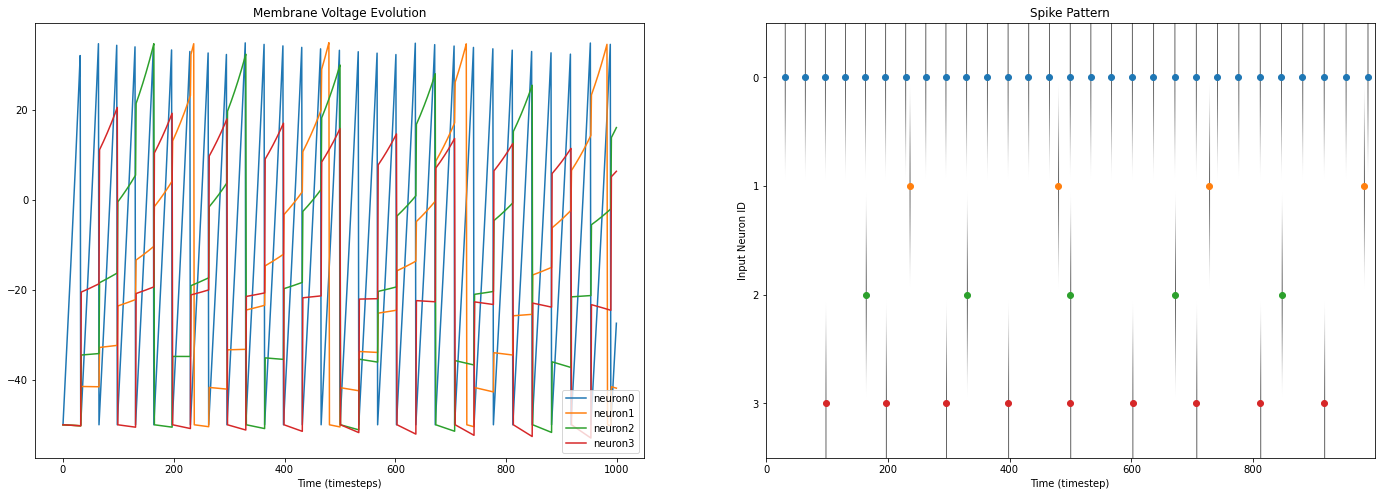

In [ ]:
# Parameters of the neuron
params = {
    'v_rest': -50.0,
    'v_thresh': 35.0,
    'u_reset_change': 100.0,
    'timestep': 0.01   #ms
}

# Parameters of the simulation
timestep = 0.01             # ms
total_time = 0.01*1000      # ms

weight_matrix = np.zeros((4,4))
weight_matrix[0,1] = 25.0
weight_matrix[0,2] = 45.0
weight_matrix[0,3] = 85.0

model = LIF_network(4, weight_matrix, params)

out_spikes = []
out_mem = []

for ts in range(int(total_time/timestep)):
  out_mem.append(np.copy(model.neuron_voltages))
  output_spikes = model.update_states_at_once()
  out_spikes.append(output_spikes)

plt.figure(figsize=(24,8))
plt.subplot(1,2,1)
plt.plot(np.asarray(out_mem)[:,0], label='neuron0')
plt.plot(np.asarray(out_mem)[:,1], label='neuron1')
plt.plot(np.asarray(out_mem)[:,2], label='neuron2')
plt.plot(np.asarray(out_mem)[:,3], label='neuron3')
plt.title("Membrane Voltage Evolution")
plt.xlabel("Time (timesteps)")
plt.legend(loc='lower right')


plt.subplot(1,2,2)
plt.imshow(np.array(out_spikes).T, aspect='auto', cmap='gray_r')

spike_times0 = np.where(np.array(out_spikes)[:,0] > 0)[0]
plt.scatter(spike_times0,[0]*(spike_times0.shape[0]))
spike_times1 = np.where(np.array(out_spikes)[:,1] > 0)[0]
plt.scatter(spike_times1,[1]*(spike_times1.shape[0]))
spike_times2 = np.where(np.array(out_spikes)[:,2] > 0)[0]
plt.scatter(spike_times2,[2]*(spike_times2.shape[0]))
spike_times3 = np.where(np.array(out_spikes)[:,3] > 0)[0]
plt.scatter(spike_times3,[3]*(spike_times3.shape[0]))

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title("Spike Pattern")
plt.ylabel("Input Neuron ID")
plt.xlabel("Time (timestep)")
plt.show()

In the graphs above we can see that the firing rate of the neurons 1 to 3 are directly influenced by their connection strength to the programmed neuron 0. Neuron 1 has the lowest connection strength and fires only four times during the simulation. Neuron 3 has the strongest connection and fires 9 times. Interestingly the connection strength of Neuron 3 is more than 3 times higher than that of Neuron 1, but the increase in firing rate is less than threefold.

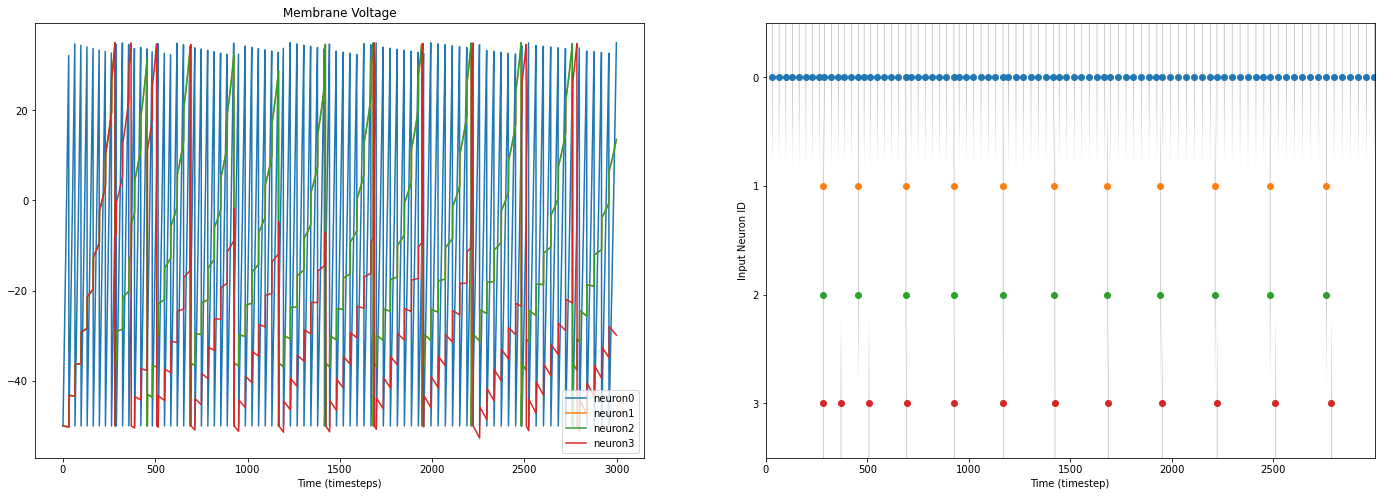

In [ ]:
# Parameters of the neuron
params = {
    'v_rest': -50.0,
    'v_thresh': 35.0,
    'u_reset_change': 100.0,
    'timestep': 0.01   #ms
}

# Parameters of the simulation
timestep = 0.01             # ms
total_time = 0.01*3000      # ms

weight_matrix = np.full((4,4),20)
weight_matrix[0,0] = 0.0
weight_matrix[1,1] = 0.0
weight_matrix[2,2] = 0.0
weight_matrix[2,3] = 100.0
weight_matrix[3,3] = 0.0

model = LIF_network(4, weight_matrix, params)

out_spikes = []
out_mem = []

# Run the model state update for each timestep of our inputs
# Store the spikes of the output neurons and a copy of the membrane voltages
for ts in range(int(total_time/timestep)):
  out_mem.append(np.copy(model.neuron_voltages))
  output_spikes = model.update_states_at_once()
  out_spikes.append(output_spikes)

plt.figure(figsize=(24,8))
plt.subplot(1,2,1)
plt.plot(np.asarray(out_mem)[:,0], label='neuron0')
plt.plot(np.asarray(out_mem)[:,1], label='neuron1')
plt.plot(np.asarray(out_mem)[:,2], label='neuron2')
plt.plot(np.asarray(out_mem)[:,3], label='neuron3')
plt.title("Membrane Voltage")
plt.xlabel("Time (timesteps)")
plt.legend(loc='lower right')


plt.subplot(1,2,2)
plt.imshow(np.array(out_spikes).T, aspect='auto', cmap='gray_r')

spike_times0 = np.where(np.array(out_spikes)[:,0] > 0)[0]
plt.scatter(spike_times0,[0]*(spike_times0.shape[0]))
spike_times1 = np.where(np.array(out_spikes)[:,1] > 0)[0]
plt.scatter(spike_times1,[1]*(spike_times1.shape[0]))
spike_times2 = np.where(np.array(out_spikes)[:,2] > 0)[0]
plt.scatter(spike_times2,[2]*(spike_times2.shape[0]))
spike_times3 = np.where(np.array(out_spikes)[:,3] > 0)[0]
plt.scatter(spike_times3,[3]*(spike_times3.shape[0]))

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.ylabel("Input Neuron ID")
plt.xlabel("Time (timestep)")
plt.show()

In this experiment, we connected all neurons which each other (no self connection) and increased the connection between Neuron 2 and Neuron 3. This results in the graphs above. Here we can see how Neuron 3 first spikes in sync with Neuron 2 and then fires out of sync. However after around 700 simulation steps, the neurons 2 and 3 are firing in synch again. At around step 1900 of the simulation, the neurons are firing out of synch again. This demonstrates the complex behaviour that coupled systems such as this one can elicit.

## Exercise 2
### 2.a.1 
For an I invariant of the time we have $\tau * \dot{v} = I-v$, this can be rewriten to: $\dfrac{dv}{I-v} = \dfrac{dt}{\tau}$, now we can integrate on both sides: $-ln(v-I)|_{v=0}^{V=1} = \dfrac{t|_{t=0}^{t_{v=1}}}{\tau}$. Notice that the integral on the left hand side runs from 0 to 1, so from the reset condition to the threshold value. Thus the $t_{v=1}$ can be interpreted as the period of the oscillation for a given $I$ and $\tau$ value. Thus the period of the ocillation for a given $I$ and $\tau$ is given by: $-\tau*ln(1-I) = T$. 

Now we can apply this to define a phase for each of the $v$ values within a trajectory. We define a phase, $\phi$, as a number between 0 and $2*\pi$ (just like on  a circle). Now for each point in the trajectory we have an associated phase $\phi = 2*\pi *t/T $, where $t$ is a value between $0$ and $T$, which can be found by changing the upper limit of v in the integration: $-\tau*ln(v-I)|_{v=0}^{V=v_{current}} = t|_{t=0}^{t_{v}}$. Thus the phase depending only on the v value is given by: $\phi = 2*\pi * \dfrac{ln(v_{current}-I)}{ln(1-I)}$. If $t>T$ we should use a new $t'=tmodT$, so that the value of $t'$ falls between $0$ and $T$.

In the case that we assume time dependence for the $I$, then we cannot use the above anymore. This becomes important in step 2, but it also results in a slightly different result for this step 1. This result is also found in literature, such as https://neuronaldynamics.epfl.ch/online/Ch1.S3.html. 

For the derivation of this result we will use integration factors: $e^{t/\tau}$. We have $\tau*\dot{v}=I-v \rightarrow \dot{v}+\dfrac{v}{\tau}=\dfrac{I}{\tau} \rightarrow \dfrac{d(e^{t/\tau}*v(t))}{dt}= \dfrac{e^{t/\tau} * I(t)}{\tau}$, where we used: $\dfrac{d e^{t/\tau}v(t)}{dt}=e^{t/\tau}*\dot{v(t)}+\dfrac{e^{t/\tau}*v(t)}{\tau}$. This we can now integrate with respect to t and, using the initial condition $v(t=0)=0$, we get: $(e^{t/\tau}*v(t))|_{t=0}^{t=t}= e^{t/\tau}*v(t) =\int_{t=0}^{t=t} e^{t'/\tau} * \dfrac{I(t')}{\tau} dt'$. Now for exercise a we can assume I to be a constant and we get: $(e^{t/\tau}*v(t))= (e^{t/\tau}-1) * \dfrac{I}{\tau} \rightarrow v(t)= (1-e^{-t/\tau}) * \dfrac{I}{\tau} $, which can be rewritten to obtain the formula for the time it takes to get to a certain value of $v$, which is the period of the function in the case of $v=1$. After rewriting you get: $t=-\tau*ln(\dfrac{-\tau*v}{I}+1)$. Now similar to th first part we get that the phase $\phi$ is now obtained by dividing the time difference between reaching the threshold and reaching a certain position $v$, similar to how it was done for the time invariant case.



### 2.a.2
Notice that here we still make use of the initial condition $v(t=0)=0$.

In this case we have $I(t)=\Delta I*\delta(t-t_{pulse}) $, thus our $I$ can no longer be assumed to be time independent (as it was in the solving of the integral above). Now we will have to use a nice property of the dirac delta function: $\int_{-\infty}^{\infty}f(t)*\delta(t-\tau)dt=f(\tau)$. We can directly apply this rule in this setting: $(e^{t/\tau}*v(t))|_{t=0}^{t=t}=\int_{t=0}^{t=t} e^{t'/\tau} * \dfrac{\Delta I*\delta(t'-t_{pulse})}{\tau} dt'$. We now have two domains: for $t \leq t_{pulse}$ the integral will be $0$ and we have $(e^{t/\tau}*v(t))|_{t=0}^{t=t} = 0 \rightarrow v(t) = 0$, and the domain $t>t_{pulse}$ for which the integral will not be $0$ but: $(e^{t/\tau}*v(t))|_{t=0}^{t=t} = \dfrac{\Delta I }{\tau} * e^{t_{pulse}/\tau} \rightarrow v(t) = \dfrac{\Delta I }{\tau} e^{(t_{pulse}-t)/\tau}$. Thus for instance at the time of the pulse $t_{pulse}$ we have the change in v(with respect to $t=0$ or any other time before the pulse would be equivalent): $v(t_{pulse})=\dfrac{\Delta I}{\tau} * e^0=\dfrac{\Delta I}{\tau} $.

### 2.a.3
For $ t < T $ we can easily define the phase as the ratio between t and T multiplied by the total phase $2*\pi$: $\phi = 2*\pi * \dfrac{ln(\dfrac{-\tau*v_{current}}{I}-1)}{ln(\dfrac{-tau*1}{I}-1)} = 2*\pi * \dfrac{ln(\dfrac{-\Delta I}{I}-1)}{ln(\dfrac{-tau*1}{I}-1)}$. Notice that the $I$ here is the time independent model parameter and $\Delta I$ is the strength of the current pulse that is supplied to the system.  


### 2.b.1
Since we have no dependency of $R$ on the $\theta$ we have no problem ignoring $\theta$ for this step, as it will not influence what R will do.
The limit cycle will appear for $\dot{R}=0$, thus for $R=\pm1$.
The stability follows directly from the lecture notes: we have $R(1-R^2)=\dot{R}$, in this we can separate the $R$ dependent and $t$ dependent parts easily and integrate: $\dfrac{dR}{R(1-R^2)}=dt$. By taking the integrals and rewriting this we get: $R^2=\dfrac{1}{1+e^{-2t}*\dfrac{1-R_{0}^2}{R_{o}^2}}$. Indeed if we now let the time run to $\infty$ then we obtain from the formula for $R^2$ two points that $R$ can converge to: $R=\pm1$. We know that $R$ represents a radius of something, and it would be nonsensical to let this be negative. Thus we only have one result to which the R can converge: $R=1$.

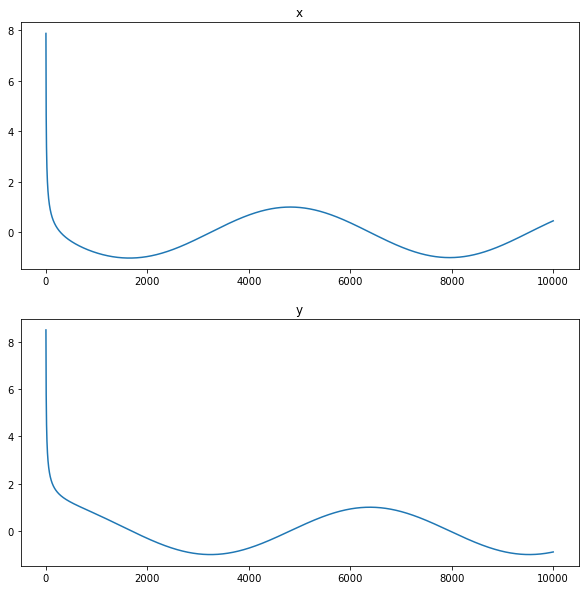

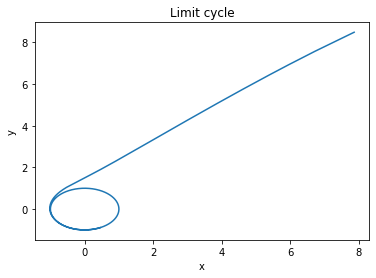

In [ ]:
def limit_cycle(x, y, steps, dt):
  f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
  ax1.set_title('x')
  ax2.set_title('y')

  xList, yList = [], []
  for i in range(steps):
     x += (x - (x**2 + y**2)*(x+y/(x**2+y**2)**0.5)) * dt
     y += (y -(x**2+y**2)*(y-x/(x**2+y**2)**0.5)) * dt
     xList.append(x)
     yList.append(y)
  ax1.plot(xList)
  ax2.plot(yList)

  plt.show()
  plt.plot(xList, yList)
  plt.title('Limit cycle')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

  return

steps, dt = 10000, 0.001
x, y = 10, 10
limit_cycle(x, y, steps, dt)

### 2.b.2
Somehow when we do the integrals we get diverging solutions, thus using the trick $t\rightarrow \infty$ will not work.

Thus we adjusted the formulas found in the handout under the self test 4 and adjusted them accordingly: $\eta =0$ and $\alpha = 1/(\sqrt{(x^2+y^2)}$


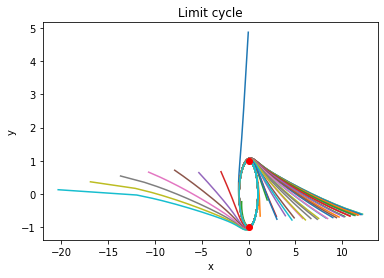

In [ ]:
steps, dt = 10000, 0.001
y = 5

for x in range(40):
  xList, yList = [], []
  for i in range(steps):
     x += (x - (x**2 + y**2)*(x+y/(x**2+y**2)**0.5)) * dt
     y += (y -(x**2+y**2)*(y-x/(x**2+y**2)**0.5)) * dt
     xList.append(x)
     yList.append(y)

  plt.plot(xList, yList)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Limit cycle')
plt.plot(0, 1, 'ro')
plt.plot(0, -1, 'ro') 
plt.show()

We indeed see that for many values the LC will be reached.

### 2.b.3

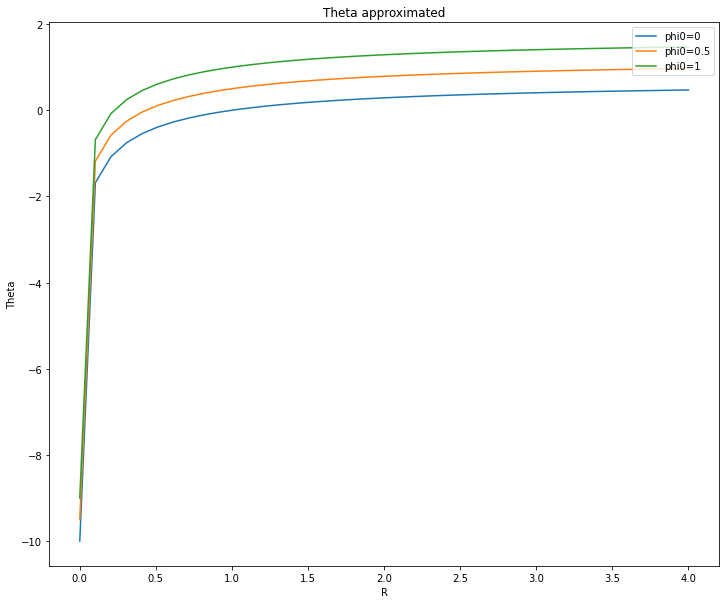

In [ ]:
#Settings
x0 = 0
interval_len = 10
stepsize = 0.0025
ode_I = lambda x,Y: np.array([(1-Y[0]**2)*Y[0],Y[0]])

plt.figure(figsize=(12,10))

thetas = []
linsp = np.linspace(0,4,40)
phi0=0
[thetas.append(tr.y[1,-1]-tr.t[-1]) for tr in [integrate.solve_ivp(fun=ode_I, t_span = (x0,interval_len), y0=[R,phi0] ,method='RK45', max_step=stepsize) for R in linsp]]
plt.plot(linsp,thetas,label='phi0={}'.format(phi0))

thetas = []
linsp = np.linspace(0,4,40)
phi0=0.5
[thetas.append(tr.y[1,-1]-tr.t[-1]) for tr in [integrate.solve_ivp(fun=ode_I, t_span = (x0,interval_len), y0=[R,phi0] ,method='RK45', max_step=stepsize) for R in linsp]]
plt.plot(linsp,thetas,label='phi0={}'.format(phi0))

thetas = []
linsp = np.linspace(0,4,40)
phi0=1
[thetas.append(tr.y[1,-1]-tr.t[-1]) for tr in [integrate.solve_ivp(fun=ode_I, t_span = (x0,interval_len), y0=[R,phi0] ,method='RK45', max_step=stepsize) for R in linsp]]
plt.plot(linsp,thetas,label='phi0={}'.format(phi0))


plt.ylabel('Theta')
plt.xlabel('R')
plt.legend(loc='upper right')
plt.title('Theta approximated')
plt.show()

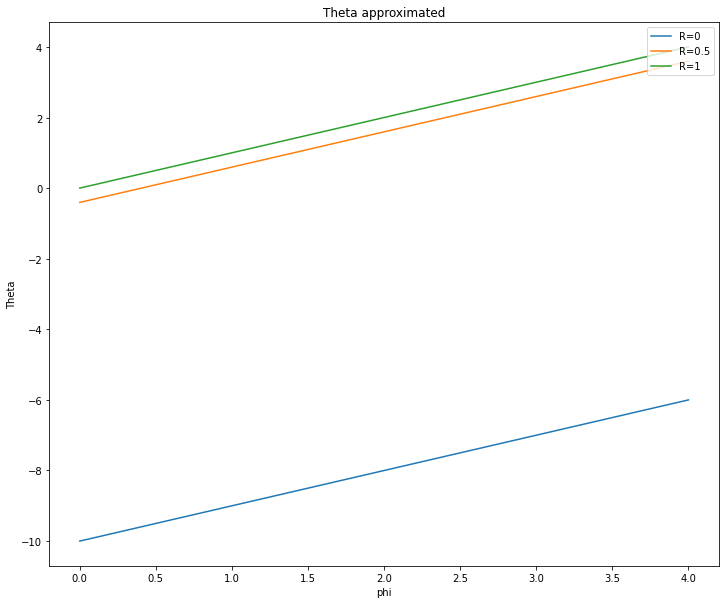

In [ ]:
#Settings
x0 = 0
interval_len = 10
stepsize = 0.0025
ode_I = lambda x,Y: np.array([(1-Y[0]**2)*Y[0],Y[0]])

plt.figure(figsize=(12,10))

thetas = []
linsp = np.linspace(0,4,40)
R=0
[thetas.append(tr.y[1,-1]-tr.t[-1]) for tr in [integrate.solve_ivp(fun=ode_I, t_span = (x0,interval_len), y0=[R,phi] ,method='RK45', max_step=stepsize) for phi in linsp]]
plt.plot(linsp,thetas,label='R={}'.format(R))

thetas = []
linsp = np.linspace(0,4,40)
R=0.5
[thetas.append(tr.y[1,-1]-tr.t[-1]) for tr in [integrate.solve_ivp(fun=ode_I, t_span = (x0,interval_len), y0=[R,phi] ,method='RK45', max_step=stepsize) for phi in linsp]]
plt.plot(linsp,thetas,label='R={}'.format(R))

thetas = []
linsp = np.linspace(0,4,40)
R=1
[thetas.append(tr.y[1,-1]-tr.t[-1]) for tr in [integrate.solve_ivp(fun=ode_I, t_span = (x0,interval_len), y0=[R,phi] ,method='RK45', max_step=stepsize) for phi in linsp]]
plt.plot(linsp,thetas,label='R={}'.format(R))

plt.ylabel('Theta')
plt.xlabel('phi')
plt.legend(loc='upper right')
plt.title('Theta approximated')
plt.show()
